# *AIB_03 / SECTION 1 / PROJECT*
---
## ❓ 다음 분기에 어떤 게임을 설계해야 할까



# > 목차 
1. 데이터 전처리
2. 데이터 분석(EDA)
3. 결론



In [ ]:
# 파일 가져오기
from google.colab import files
myfile = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
# 데이터 불러오기
import io
df_raw = pd.read_csv(io.BytesIO(myfile["vgames2.csv"]))
df_raw.drop(columns=["Unnamed: 0"], inplace=True)  # "Unnamed: 0" 컬럼 삭제

#1. 데이터 전처리
- 입력값이 없는 데이터를 가진 행(row) 처리
> - 연도(Year)와 장르(Genre) - -> 결측치를 가진 행(row) 제거
> - 제작회사(Publisher) - - - - - - > 결측치를 가진 행(row) 유지

- 연도 단위 통일 (yyyy)
> - 1 - - - - - -> 2001
> - 98 - - - - -> 1998
> - 1985 - - -> 1985
> - 2011 - - -> 2011

- 출고량 단위 통일
> - 100K - - - - > 100 * 10^3 - - - -> 100000
> - 10M - - - - -> 10 * 10^6 - - - - -> 10000000
> - 1000000 - - - - - - - - - - - - - - - -> 1000000


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# 데이터 type & 결측치 확인
df_raw.info()
print("\n")

# 게임 트렌드 분석에 영향을 주는 "Year", "Genre" 컬럼에서만
# 결측치가 존재하는 row 삭제 
df = df_raw.dropna(subset=["Year", "Genre"])
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher  

In [ ]:
# "Year" 컬럼의 값을 yyyy형태로 통일 데이터타입 int로 변경
def change_y(i) :
  if i < 22 :  
    return i + 2000
  if 22 < i < 100 :
    return i + 1900
  else :
    return i

df["Year"] = df["Year"].apply(change_y).astype(int)
df["Year"].unique() # 결과 확인

In [ ]:
# "~_Sales" 컬럼의 "K", "M" 제거 & scal 통일 & 데이터타입 float으로 변경
def unified_sales(i) : 
  if "K" in i : 
    i = i[:len(i)-1]
    return float(i) * 10**3
  if "M" in i :
    i = i[:len(i)-1]
    return float(i) * 10**6
  else :
    return float(i) * 10**6

# 함수 적용
locals = ["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"]
for column_name in locals :
  df[column_name] = df[column_name].apply(unified_sales)

In [ ]:
# 중복값 확인
df.duplicated().value_counts()

False    16277
dtype: int64

#2. 데이터 분석(EDA)
- Total_Sales (지역별 출고량의 합) 항목 추가
- 연도별 오름차순 정렬

In [ ]:
# 각 지역의 Sales의 합을 보여주는 "Total_Sales" 컬럼 생성
df["Total_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]

# "Year"컬럼 오름차순 정렬 & index reset
df.sort_values(by=["Year"], inplace=True)
df.reset_index(drop=True, inplace=True)

- 본 데이터의 Platform feature에는 PC, PlayStaion, XBox, Wii 등이 존재한다.
- 본 데이터셋은 콘솔게임 데이터인 것을 알 수 있다. 

In [ ]:
# 변수 선언
locals = ["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"]
sales = ["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales", "Total_Sales"]
years = df["Year"].unique()
platforms = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
             'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
             'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
             '3DO', 'GG', 'PCFX']
genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
          'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']

#2-1. 연도별 출시 게임 수 & 지역별 출고량 변화

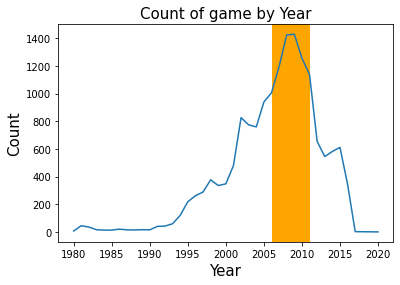

In [ ]:
# 연도별 출시 게임의 수량 변화 시각화
game_counts = df.groupby("Year")["Name"].count()

plt.plot(game_counts.index, game_counts)
plt.title("Count of game by Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.axvspan(2006, 2011, facecolor='orange')
plt.show()

- 연도별 출시 게임의 수량 변화 
>- 출시된 게임이 많은 연도는 2006년~2011년으로 연간 1000개 이상의 게임이 출시되었다.
>- 2008년 이후로 부터 현재까지 출시 게임의 수량은 감소하는 추세를 보인다.

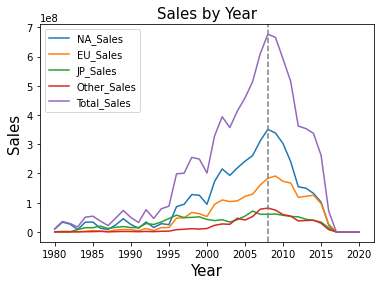

In [ ]:
# 연도별 출고량 변화 시각화
game_sales = df.groupby("Year")[sales].sum()

for i in sales : 
  plt.plot(game_sales.index, game_sales[i])

plt.title("Sales by Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.axvline(x=2008, linestyle="--", color="gray")
plt.legend(sales)
plt.show()

- 연도별 출고량의 변화
>- 전 지역의 콘솔게임 출고량 합이 최대인 연도는 2008년 이다.
>- 2008년에 전체 출고량의 절반 정도를 북미 지역이 차지하는 것을 확인할 수 있다.
>- 2008년 이후로 출고량이 전체적으로 감소하는 추세를 보인다.
##### 이는 '스마트폰 대중화' 에 따른 현상으로 예상된다. 

---
###❓  다음 분기에 어떤 게임을 설계해야 할까
### 게임 장르 / 출시 지역 / 플랫폼
---

#2-2. 연도별 게임 트렌드 분석

>- 2008년도 ~ 2020년도
>- 게임의 출고량

In [ ]:
df[(df["Year"]>=2008)].index

Int64Index([ 8295,  8296,  8297,  8298,  8299,  8300,  8301,  8302,  8303,
             8304,
            ...
            16267, 16268, 16269, 16270, 16271, 16272, 16273, 16274, 16275,
            16276],
           dtype='int64', length=7982)

In [ ]:
# 2008~2020년도 데이터프레임 생성
df_2008 = df[8295:]

#(1) 지역별 선호 장르

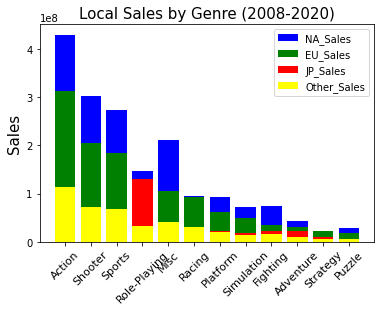

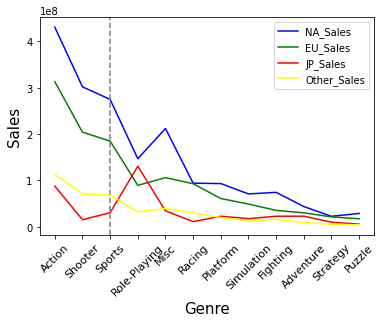

In [82]:
# 장르별 지역 출고량 시각화
genre_sales = df_2008.groupby("Genre")[sales].sum()
genre_sales.sort_values(by="Total_Sales", inplace=True, ascending=False)
colors = {"NA_Sales" : 'blue', "EU_Sales": 'green', "JP_Sales" : 'red', "Other_Sales" : 'yellow'}

# bar plot
genre_sales2 = genre_sales.reset_index()

for i in locals :
  plt.bar(genre_sales2["Genre"], genre_sales2[i], label=i, color=colors[i])

plt.title("Local Sales by Genre (2008-2020)", fontsize=15)
plt.xticks(rotation =45, fontsize=11)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.show()

# line plot
for i in locals :
  plt.plot(genre_sales.index, genre_sales[i], label=i, color=colors[i])

plt.xticks(rotation =45, fontsize=11)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.axvline(x="Sports", linestyle="--", color="gray")
plt.show()


- 장르별 지역 출고량
>- 일본을 제외한 모든 지역에서 선호도가 높은 게임 장르는 Action, Shooter, Sports 순서로 동일하다.
>- 일본에서 가장 선호도가 높은 게임 장르는 Role-Playing 이다.
>- 일본을 제외하고 전체적으로 선호하는 장르는 매우 유사한 패턴을 가지는 것으로 보인다.

## >> 지역별 선호 장르는 비슷한가? 
##(카이제곱검정)

>- 귀무가설1 : 선호 장르는 지역별 차이가 없다. 

In [72]:
from scipy.stats import chi2_contingency
chi1 = chi2_contingency(genre_sales, correction = False)
print("귀무가설1\n")

if 0 <= chi1[1] <0.05 :
  print("chi2__value :", chi1[0], "\np_value :", chi1[1], "\n선호 장르는 지역별 차이가 있다.")
if 0.1 <= chi1[1] :
  print("chi2__value :", chi1[0], "\np_value :", chi1[1], "\n선호 장르는 지역별 차이가 없다. ")

귀무가설1

chi2__value : 311278144.372897 
p_value : 0.0 
선호 장르는 지역별 차이가 있다.


>- 귀무가설2 : 북미와 유럽의 선호 장르는 차이가 없다.


In [73]:
chi2 = chi2_contingency(genre_sales[locals[:2]], correction = False)
print("귀무가설2\n")

if 0 <= chi2[1] <0.05 :
  print("chi2__value :", chi2[0], "\np_value :", chi2[1], "\n북미와 유럽의 선호 장르는 차이가 있다")
if 0.1 <= chi2[1] :
  print("chi2__value :", chi2[0], "\np_value :", chi2[1], "\n북미와 유럽의 선호 장르는 차이가 없다.")

귀무가설2

chi2__value : 19134145.10944388 
p_value : 0.0 
북미와 유럽의 선호 장르는 차이가 있다


>- 귀무가설3 : 북미와 일본의 선호 장르는 차이가 없다.

In [77]:
chi3 = chi2_contingency(genre_sales.loc[:,["NA_Sales", "JP_Sales"]], correction = False)
print("귀무가설3\n")

if 0 <= chi3[1] <0.05 :
  print("chi2__value :", chi3[0], "\np_value :", chi3[1], "\n북미와 일본의 선호 장르는 차이가 있다.")
if 0.1 <= chi3[1] :
  print("chi2__value :", chi3[0], "\np_value :", chi3[1], "\n북미와 일본의 선호 장르는 차이가 없다.")

귀무가설3

chi2__value : 226937466.79911363 
p_value : 0.0 
북미와 일본의 선호 장르는 차이가 있다.


##>> 결과
- 시각화 자료에서는 지역별 선호 장르(일본 제외)는 매우 유사한 패턴을 보였다.
- 모든 지역별 선호 장르는 통계적으로 유의하게 차이가 있는 것으로  확인되었다.
>- 출시할 지역에 따라 어떤 장르의 게임을 만들 것인가?
>- 장르에 따라 어떤 지역에서 게임을 출시할 것인가?

#(2) 지역별 선호 플랫폼

In [ ]:
# 플랫폼별("Total_Sales" 기준 상위 10위) 지역 출고량 시각화 
platform_sales = df_2008.groupby("Platform").sum()
platform_sales.sort_values(by="Total_Sales", inplace=True, ascending=False)

platform_sales.index[:10]

Index(['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'PC', 'XOne', 'PSP', 'PS2'], dtype='object', name='Platform')

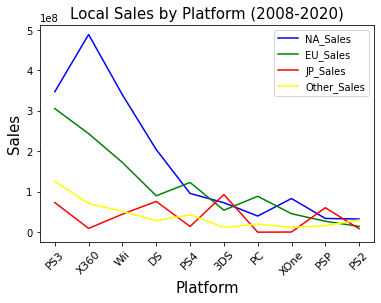

In [ ]:
# line plot
for i in locals :
  plt.plot(platform_sales.index[:10], platform_sales.loc[:'PS2', i], label=i, color=colors[i])

plt.title("Local Sales by Platform (2008-2020)", fontsize=15)
plt.xticks(rotation =45, fontsize=11)
plt.xlabel("Platform", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.show()

- 지역별 선호 플랫폼
>- 지역마다 다른 패턴을 보인다.

>   - 지역별 선호하는 플랫폼
>      - 북미 : X360
>      - 유럽 : PS3
>      - 일본 : 3DS
>      - 기타 : PS3

#(3) 연도별 장르의 출고량 변화

In [ ]:
# 연도별 장르별 "Total_Sales" dataframe 생성
genre_years = pd.DataFrame({"Year":df_2008["Year"]})
for i in genres : 
  genre_years = genre_years.merge(pd.DataFrame({i:df_2008[(df_2008["Genre"]==i)]
                                                .groupby("Year").sum()["Total_Sales"]}), 
                                  how="outer", on="Year")
# 중복값 삭제
genre_years.drop_duplicates(inplace=True)

# 결측치 = 0
genre_years.fillna(0, inplace=True)

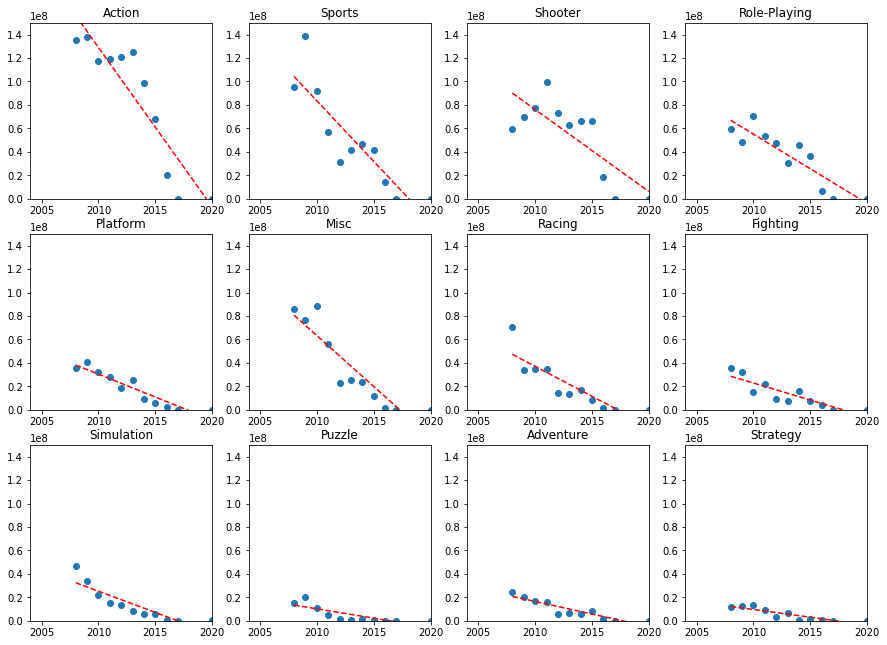

In [ ]:
# 시각화
fig, axs = plt.subplots(3, 4, figsize=(15, 11))

for i in range(len(genres)) :  
  if i <= 3: #axs의 row 설정
    r = 0
  elif i > 3 and i <= 7 :
      r = 1
  elif i > 7 and i <= 11 :
      r = 2
  c = i%4  #axs의column 설정

  x = genre_years["Year"]
  y = genre_years[genres[i]]
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)

  axs[r, c].scatter(x, y)
  axs[r, c].set_title(genres[i])
  axs[r, c].set_ylim(0,150000000)
  axs[r, c].set_xlim(2004, 2020)
  axs[r, c].plot(x,p(x),"r--") # 추세선 그리기
plt.show()

- 연도별 장르의 출고량 변화
>- 모든 게임 장르에서 시간에 지남에 따라 출고량이 줄어든다.
>- 가장 가파르게 감소 추세를 보이는 장르는 Action이다.



#(4) 연도별 플랫폼에 따른 출고량 변화

In [ ]:
df_2008["Platform"].unique()

array(['X360', 'DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS2', 'XB', 'DC', '3DS',
       'PSV', 'WiiU', 'PS4', 'XOne'], dtype=object)

In [ ]:
# 플랫폼별 출고량 변화
platform_years = pd.DataFrame({"Year":df_2008["Year"]})
list_p = df_2008["Platform"].unique()

for i in list_p : 
  platform_years = platform_years.merge(pd.DataFrame({i:df_2008[(df_2008["Platform"]==i)]
                                                      .groupby("Year").sum()["Total_Sales"]}), 
                                        how="outer", on="Year")
# 중복값 삭제
platform_years.drop_duplicates(inplace=True)

# 결측치 = 0
platform_years.fillna(0, inplace=True)

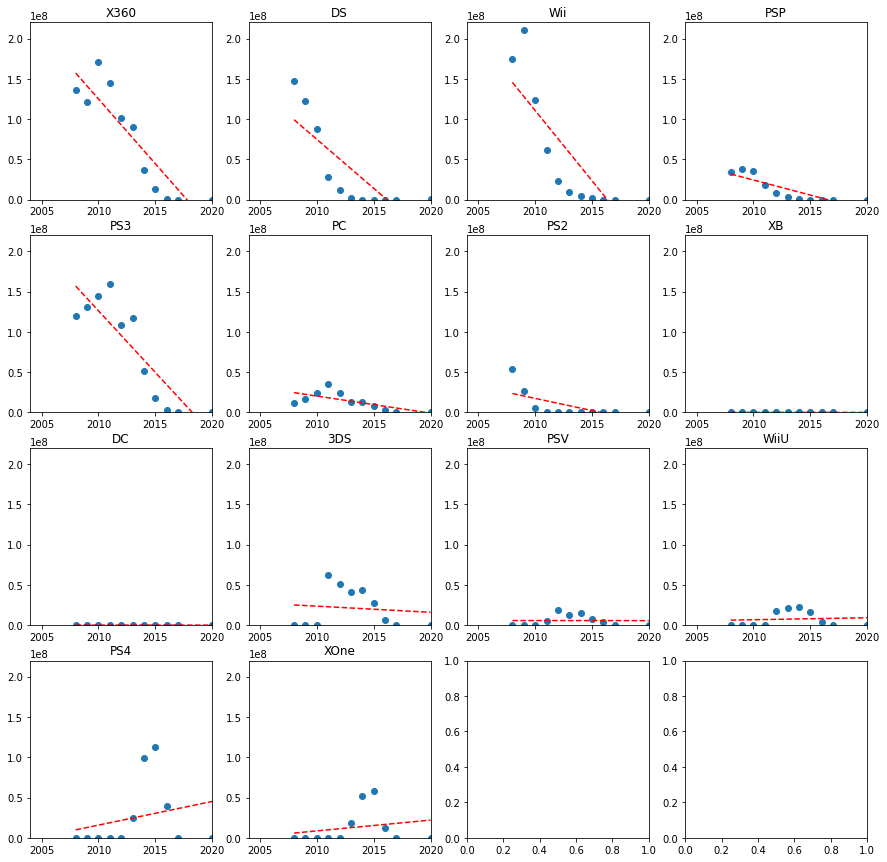

In [ ]:
# 시각화
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i in range(len(list_p)) :  
  if i <= 3: #axs의 row 설정
    r = 0
  elif i > 3 and i <= 7 :
      r = 1
  elif i > 7 and i <= 11 :
      r = 2
  elif i > 11 and i <= 15 :
      r = 3
  c = i%4  #axs의column 설정

  x = platform_years["Year"]
  y = platform_years[list_p[i]]
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)

  axs[r, c].scatter(x, y)
  axs[r, c].set_title(list_p[i])
  axs[r, c].set_ylim(0,220000000)
  axs[r, c].set_xlim(2004, 2020)
  axs[r, c].plot(x,p(x),"r--") # 추세선 그리기
plt.show()

- 플랫폼별 출고량 변화
>- 시간에 지남에 따라 출고량이 줄어드는 경향을 보인다. (일부 플랫폼 제외)
>- 가장 가파르게 감소 추세를 보이는 플랫폼은 X360과 PS3이다.

#(5) 출고량이 높은 게임 분석

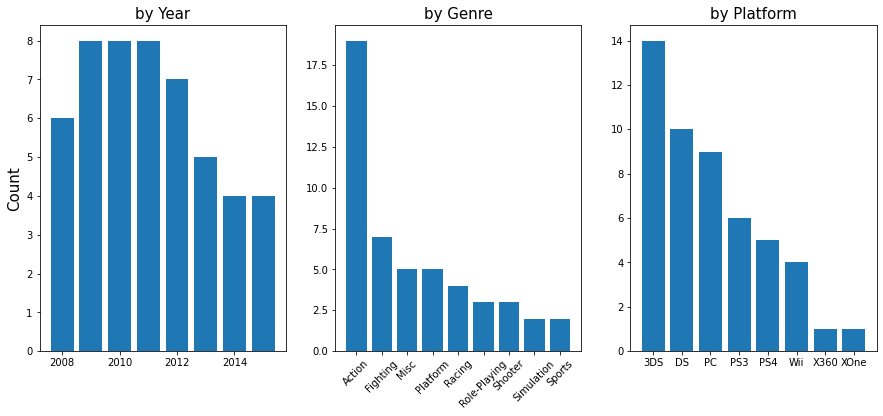

In [ ]:
# "Total_Sales" 출고량이 높은 게임 (상위 50개)
sales_T = df_2008.sort_values(by="Total_Sales", ascending=False)[:50]
sales_T_G = sales_T.groupby("Genre")["Name"].count()
sales_T_P = sales_T.groupby("Platform")["Name"].count()
sales_T_Y = sales_T.groupby("Year")["Name"].count()

# 시각화 : 연도, 장르, 플랫폼
fig, (axs1,axs2, axs3) = plt.subplots(1, 3, figsize=(15, 6))

axs1.bar(sales_T_Y.index, sales_T_Y.to_numpy()) 
axs1.set_title("by Year", fontsize=15)
axs1.set_ylabel("Count", fontsize=15)

axs2.bar(sales_T_G.index, sales_T_G.sort_values(ascending=False)) 
axs2.set_title("by Genre", fontsize=15)
axs2.tick_params(axis='x', rotation=45)

axs3.bar(sales_T_P.index, sales_T_P.sort_values(ascending=False)) 
axs3.set_title("by Platform", fontsize=15)

plt.show()

- 지역별 출고량 합이 높은 게임 (상위 50개)
>- Action 장르에서 가장 많다.
>- 3DS 플랫폼에서 가장 많다.

In [78]:
# 지역별 출고량이 높은 게임 (상위 10개)
sales_NA = df_2008.sort_values(by="NA_Sales", ascending=False)[:10]
sales_EU = df_2008.sort_values(by="EU_Sales", ascending=False)[:10]
sales_JP = df_2008.sort_values(by="JP_Sales", ascending=False)[:10]
sales_OH = df_2008.sort_values(by="Other_Sales", ascending=False)[:10]

sales_A = pd.concat([sales_NA, sales_EU, sales_JP, sales_OH])
sales_A.drop_duplicates(inplace=True)
sales_A.shape

(28, 10)

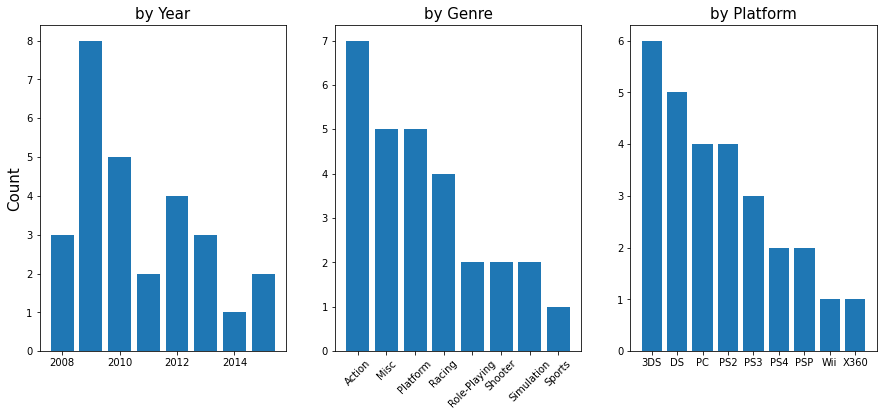

In [ ]:
sales_A_G = sales_A.groupby("Genre")["Name"].count()
sales_A_P = sales_A.groupby("Platform")["Name"].count()
sales_A_Y = sales_A.groupby("Year")["Name"].count()

# 시각화 : 연도, 장르, 플랫폼
fig, (axs1,axs2, axs3) = plt.subplots(1, 3, figsize=(15, 6))

axs1.bar(sales_A_Y.index, sales_A_Y.to_numpy()) 
axs1.set_title("by Year", fontsize=15)
axs1.set_ylabel("Count", fontsize=15)

axs2.bar(sales_A_G.index, sales_A_G.sort_values(ascending=False)) 
axs2.set_title("by Genre", fontsize=15)
axs2.tick_params(axis='x', rotation=45)

axs3.bar(sales_A_P.index, sales_A_P.sort_values(ascending=False)) 
axs3.set_title("by Platform", fontsize=15)

plt.show()

- 지역별 출고량이 높은 게임 (지역별 상위 10개)
>- Action 장르에서 가장 많다.
>- 3DS 플랫폼에서 가장 많다.

#3. 결론
##❓  다음 분기에 어떤 게임을 설계해야 할까

##* 게임 장르 : Action


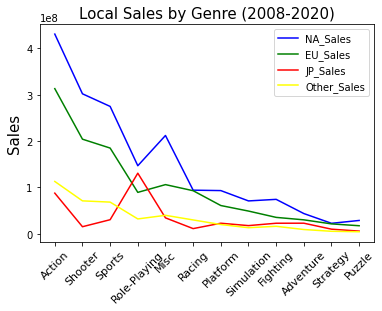

In [79]:
# line plot
for i in locals :
  plt.plot(genre_sales.index, genre_sales[i], label=i, color=colors[i])

plt.title("Local Sales by Genre (2008-2020)", fontsize=15)
plt.xticks(rotation =45, fontsize=11)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.show()


>- 일본을 제외한 모든 지역에서 가장 선호도가 높은 장르이다.


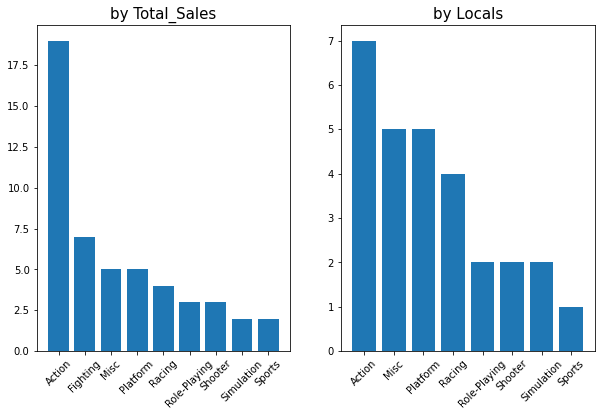

In [76]:
fig, (axs1,axs2) = plt.subplots(1, 2, figsize=(10, 6))

axs1.bar(sales_T_G.index, sales_T_G.sort_values(ascending=False)) 
axs1.set_title("by Total_Sales", fontsize=15)
axs1.tick_params(axis='x', rotation=45)

axs2.bar(sales_A_G.index, sales_A_G.sort_values(ascending=False)) 
axs2.set_title("by Locals", fontsize=15)
axs2.tick_params(axis='x', rotation=45)

>- '출고량이 높은 게임' 중 Action 장르로 출시된 게임이 가장 많았다.

##* 출시 지역 : 북미 지역


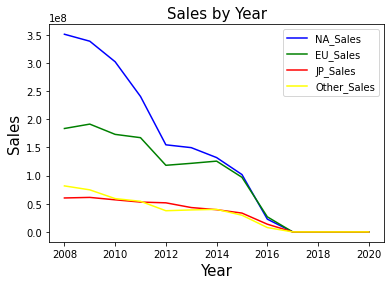

In [ ]:
# 연도별 출고량 변화 시각화
local_years = df_2008.groupby("Year")[locals].sum()

for i in locals : 
  plt.plot(local_years.index, local_years[i], color=colors[i])

plt.title("Sales by Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(sales)
plt.show()

>- 2008년도 부터 최근까지 출고량이 가장 높다. 
>- 즉, 시장규모가 가장 크기때문이다.

##* 플랫폼 : X360

In [ ]:
# Action 장르의 출시 게임 count
platform_count = df_2008[(df_2008["Genre"]=="Action")].groupby("Platform").count()
platform_count = platform_count.sort_values(by="Name", ascending=False)["Name"]

# Action 장르의 출고량
platform_T = df_2008[(df_2008["Genre"]=="Action")].groupby("Platform").sum()
platform_T = platform_T.sort_values(by="Total_Sales", ascending=False)["Total_Sales"]

Action_platform = pd.concat([platform_T, platform_count], axis=1)
Action_platform.columns = ["Total_Sales", "Counts"]
Action_platform["Sales/Counts"] = round(Action_platform["Total_Sales"] / Action_platform["Counts"], 0)
Action_platform.sort_values(by="Sales/Counts", ascending=False, inplace=True)
Action_platform

,Total_Sales,Counts,Sales/Counts
X360,218470000.0,266,821316.0
PS3,283740000.0,346,820058.0
PS4,84700000.0,121,700000.0
XOne,33780000.0,68,496765.0
Wii,79820000.0,181,440994.0
DS,73940000.0,222,333063.0
PS2,17580000.0,54,325556.0
3DS,56490000.0,180,313833.0
WiiU,19310000.0,63,306508.0
PSP,31890000.0,152,209803.0


>- Action 장르에서 출시게임 수량 대비 출고량이 가장 높은 플랫폼은 X360 이다.


In [ ]:
# 북미 지역 상위 50 : 플랫폼 count
sales_NA_50 = df_2008.sort_values(by="NA_Sales", ascending=False)[:50]
sales_NA_50_P = pd.DataFrame({"Counts":sales_NA_50.groupby("Platform")["Name"].count()})
sales_NA_50_P.sort_values(by="Counts", ascending=False, inplace=True)
sales_NA_50_P

,Counts
Platform,
X360,21
Wii,12
PS3,8
3DS,4
DS,2
PS4,2
XOne,1


>- 북미 지역의 출고량 상위 게임 50개 : X360 플랫폼이 21개로 가장 많다.

In [ ]:
# 북미 지역 상위 50 : 장르 count, 출고량
sales_NA_50_G = pd.DataFrame({"Counts":sales_NA_50.groupby("Genre")["Name"].count()})
sales_NA_50_G["NA_Sales"] = sales_NA_50.groupby("Genre")["NA_Sales"].sum()
sales_NA_50_G.sort_values(by="Counts", ascending=False, inplace=True)
sales_NA_50_G["Sales/Counts"] = round(sales_NA_50_G["NA_Sales"] /sales_NA_50_G["Counts"], 0)
sales_NA_50_G

,Counts,NA_Sales,Sales/Counts
Genre,,,
Shooter,19,113520000.0,5974737.0
Action,8,43330000.0,5416250.0
Misc,6,40090000.0,6681667.0
Platform,5,30050000.0,6010000.0
Role-Playing,5,21810000.0,4362000.0
Sports,4,32260000.0,8065000.0
Racing,2,20590000.0,10295000.0
Fighting,1,6750000.0,6750000.0


>- 북미 지역의 출고량 상위 게임 50개 : 
     - 출시 게임 수량이 가장 많은 게임은 Shooter 장르이고,  Action은 두 번째이다.
     - 그러나 게임 수량 대비 출고량은 큰 차이가 나지않는다.
     - 비슷한 출고량을 기대할 수 있으면서도 경쟁이 덜 치열한 Action 장르를 선택한다.

#> 요약



## Action 장르를 선택한다.
- 콘솔게임 유저에게 대중성이 가장 높은 장르이다.
>- 일본을 제외한 모든 지역에서 가장 선호도가 높은 장르이다.
>- 출고량이 높은 게임은 Action 장르에서 가장 많이 나타났다.
---
## 북미 지역을 선택한다.
- 콘솔게임의 시장규모가 가장 크다.
>- 2008년도 부터 최근까지 출고량이 가장 높다.  
---
## 플랫폼은 X360을 선택한다.
- Action장르에서 게임 당 출고량이 높은 플랫폼은 X360 이다.
>- Action 장르에서 총 출고량은 PD3 플랫폼 이 높지만, 출시 게임 1개당 출고량은 X360 플랫폼이 높다.

- 북미 지역에서 가장 선호하는 플랫폼은 X360 이다.
>- 북미 지역의 출고량 상위 게임 50개 중 X360 플랫폼이 21개로 가장 많다.
>- 북미 지역의 출고량 상위 게임 50개 중 Shooter 장르가 19개, Action 장르가 8개이지만,
>- 게임 장르 당 출고량은 Shooter와 Action에서 큰 차이가 없다.
---

###🏆  다음 분기에 어떤 게임을 설계해야 할까
## Action 장르 / 북미 지역 / X360 플랫폼